In [11]:
import sys
sys.path.append('../')

In [12]:
from scripts.utils import data_path, set_mpl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
%matplotlib inline




  You can calibrate a p_any cut-off with the following steps:
   1) Create a offset catalogue to simulate random sky positions:
      nway-create-fake-catalogue.py --radius 40 ERO_lhpv_03_23_sd01_a15_g14.fits ERO_lhpv_03_23_sd01_a15_g14-fake.fits
   2) Match the offset catalogue in the same way as this run:
      /Users/sdbykov/opt/miniconda3/envs/venv_hea/bin/nway.py ERO_lhpv_03_23_sd01_a15_g14-fake.fits :pos_err desi_lh.fits 0.1 --out=nway_distance_only_auto_cal.fits-fake.fits --radius 20 --mag DESI:nnprior DESI_nnprior_fit.txt --mag-radius 5
   3) determining the p_any cutoff that corresponds to a false-detection rate
      nway-calibrate-cutoff.py nway_distance_only_auto_cal.fits nway_distance_only_auto_cal.fits-fake.fits



# Create two fake catalogues:

one with random positions and one with constant shift of 100 arcsec

In [13]:
"""
cd /Users/sdbykov/work/lockman_hole/0_data/

nway-create-fake-catalogue.py --radius 40 ERO_lhpv_03_23_sd01_a15_g14.fits ERO_lhpv_03_23_sd01_a15_g14_random.fits;
nway-create-shifted-catalogue.py --radius 40 --shift-dec 300 ERO_lhpv_03_23_sd01_a15_g14.fits ERO_lhpv_03_23_sd01_a15_g14_shifted.fits;

"""

'\ncd /Users/sdbykov/work/lockman_hole/0_data/\n\nnway-create-fake-catalogue.py --radius 40 ERO_lhpv_03_23_sd01_a15_g14.fits ERO_lhpv_03_23_sd01_a15_g14_random.fits;\nnway-create-shifted-catalogue.py --radius 40 --shift-dec 300 ERO_lhpv_03_23_sd01_a15_g14.fits ERO_lhpv_03_23_sd01_a15_g14_shifted.fits;\n\n'

# Nway run in distnce-only mode

In [14]:
''' 
cd /Users/sdbykov/work/lockman_hole/0_data/`


nway.py ERO_lhpv_03_23_sd01_a15_g14.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_distance_only.fits --radius 20;
nway.py ERO_lhpv_03_23_sd01_a15_g14_random.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_distance_only_random.fits --radius 20;
nway.py ERO_lhpv_03_23_sd01_a15_g14_shifted.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_distance_only_shifted.fits --radius 20;


nway-calibrate-cutoff.py nway/nway_distance_only.fits nway/nway_distance_only_random.fits
nway-calibrate-cutoff.py nway/nway_distance_only.fits nway/nway_distance_only_shifted.fits




random cat AND shifted cat:
For a false detection rate of <1%
--> use only counterparts with p_any>0.87 (0.11% of matches)

For a false detection rate of <3%
--> use only counterparts with p_any>0.81 (0.23% of matches)

For a false detection rate of <5%
--> use only counterparts with p_any>0.77 (0.33% of matches)

For a false detection rate of <10%
--> use only counterparts with p_any>0.72 (0.46% of matches)



'''

' \ncd /Users/sdbykov/work/lockman_hole/0_data/`\n\n\nnway.py ERO_lhpv_03_23_sd01_a15_g14.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_distance_only.fits --radius 20;\nnway.py ERO_lhpv_03_23_sd01_a15_g14_random.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_distance_only_random.fits --radius 20;\nnway.py ERO_lhpv_03_23_sd01_a15_g14_shifted.fits :pos_err desi_lh.fits 0.1 --out=nway/nway_distance_only_shifted.fits --radius 20;\n\n\nnway-calibrate-cutoff.py nway/nway_distance_only.fits nway/nway_distance_only_random.fits\nnway-calibrate-cutoff.py nway/nway_distance_only.fits nway/nway_distance_only_shifted.fits\n\n\n\n\nrandom cat AND shifted cat:\nFor a false detection rate of <1%\n--> use only counterparts with p_any>0.87 (0.11% of matches)\n\nFor a false detection rate of <3%\n--> use only counterparts with p_any>0.81 (0.23% of matches)\n\nFor a false detection rate of <5%\n--> use only counterparts with p_any>0.77 (0.33% of matches)\n\nFor a false detection rate of <10%\n--> use onl

In [15]:
dat = Table.read(data_path+'nway/nway_distance_only.fits', format='fits')
matches = dat.to_pandas()
matches.sort_values(by=['EROSITA_ID', 'p_i' ], inplace=True, ascending=[True, False])
matches.head(5)

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,EROSITA_ML_FLUX_0,DESI_release,DESI_objid,DESI_brickid,DESI_ra,DESI_dec,...,DESI_dered_mag_w4,Separation_DESI_EROSITA,Separation_max,ncat,dist_bayesfactor,dist_post,p_single,p_any,p_i,match_flag
13713,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,9011,239,606779,154.763287,56.506903,...,15.958293,4.917724,4.917724,2,9.321630,0.467263,0.467263,0.740498,0.307373,1
13714,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,9011,231,606779,154.762154,56.504538,...,NaN,5.167984,5.167984,2,9.299730,0.454734,0.454734,0.740498,0.292258,2
13711,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,9011,263,606779,154.767108,56.505610,...,NaN,6.306570,6.306570,2,9.186378,0.391131,0.391131,0.740498,0.225120,2
13712,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,9011,270,606779,154.767902,56.504561,...,14.452395,8.700814,8.700814,2,8.874632,0.238597,0.238597,0.740498,0.109817,0
13715,b'SRGe J101903.3+563020',154.763934,56.505585,5.001804,2.171120e-14,9011,259,606779,154.766620,56.502810,...,NaN,11.326488,11.326488,2,8.418395,0.098775,0.098775,0.740498,0.038409,0


In [17]:
dat = Table.read(data_path+'nway/nway_distance_only_random.fits', format='fits')
matches_rand = dat.to_pandas()
matches_rand.sort_values(by=['EROSITA_ID', 'p_i' ], inplace=True, ascending=[True, False])
matches_rand.head(5)

,EROSITA_ID,EROSITA_RA,EROSITA_DEC,EROSITA_pos_err,EROSITA_ML_FLUX_0,DESI_release,DESI_objid,DESI_brickid,DESI_ra,DESI_dec,...,DESI_dered_mag_w4,Separation_DESI_EROSITA,Separation_max,ncat,dist_bayesfactor,dist_post,p_single,p_any,p_i,match_flag
10470,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,9011,398,606779,154.789385,56.497124,...,17.860834,6.066957,6.066957,2,9.212102,0.405324,0.405324,0.454405,0.818367,1
10469,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,9011,426,606779,154.793393,56.497386,...,NaN,11.309926,11.309926,2,8.421648,0.099444,0.099444,0.454405,0.132585,0
10471,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,9011,436,606779,154.795591,56.497017,...,14.501750,14.437622,14.437622,2,7.722952,0.021621,0.021621,0.454405,0.026534,0
10472,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,9011,381,606779,154.786876,56.491487,...,17.654097,14.856746,14.856746,2,7.616427,0.016998,0.016998,0.454405,0.020762,0
10467,b'SRGe J101903.3+563020',154.788895,56.49546,5.001804,2.171120e-14,9011,444,606779,154.796880,56.498503,...,13.738301,19.280264,19.280264,2,6.306278,0.000846,0.000846,0.454405,0.001017,0


In [26]:
matches.p_any.quantile(1-0.33)

0.7823633551597595

<AxesSubplot:>

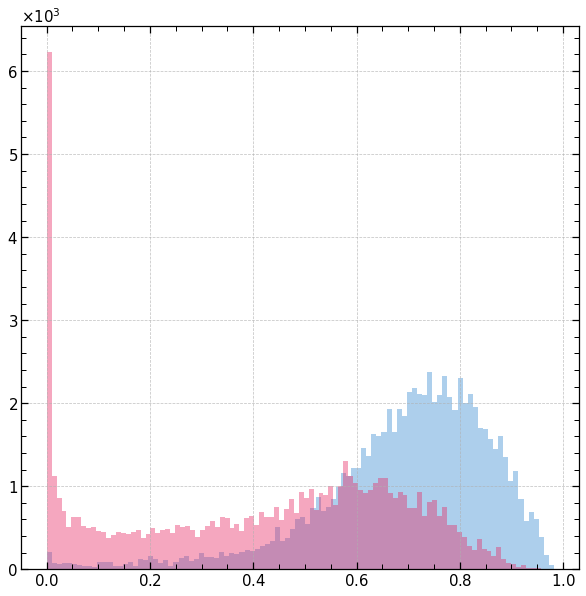

In [20]:
plt.figure(figsize=(10,10))
matches.p_any.hist(bins=100, alpha = 0.4)
matches_rand.p_any.hist(bins=100, alpha = 0.4)

<Figure size 720x720 with 0 Axes>

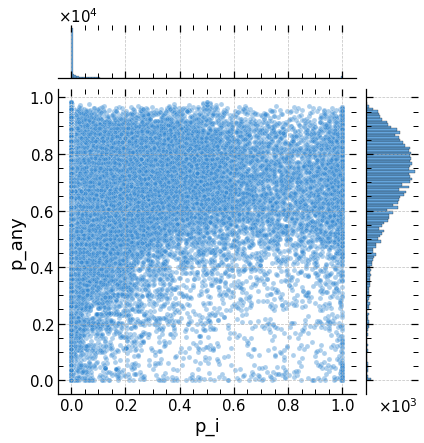

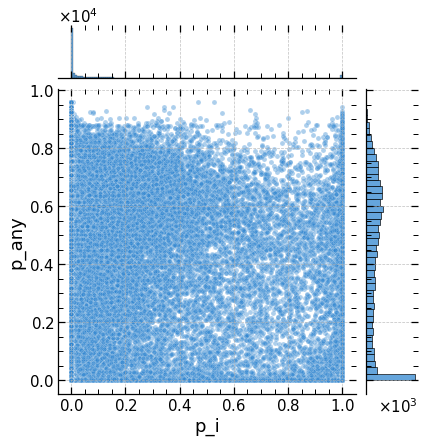

In [31]:
plt.figure(figsize=(10,10))
sns.jointplot(x = matches.p_i, y = matches.p_any, alpha = 0.4)
sns.jointplot(x = matches_rand.p_i, y = matches_rand.p_any, alpha = 0.4)

Text(0, 0.5, 'p_any')

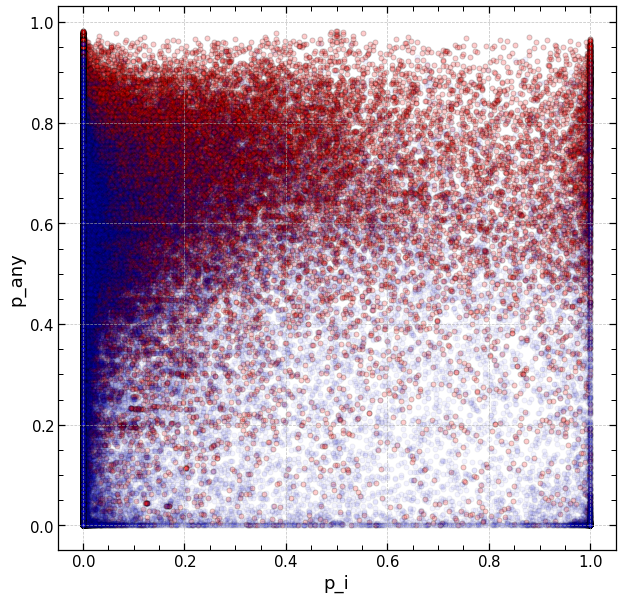

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(matches.p_i, matches.p_any, alpha = 0.2, c = 'red')
plt.scatter(matches_rand.p_i, matches_rand.p_any, alpha = 0.05, c = 'blue')
plt.xlabel('p_i')
plt.ylabel('p_any')